In this guide we will focus on some important moments that have not been mentioned before

Updating and importing the libraries:

In [1]:
!pip install --upgrade pip
!pip install --upgrade scikit-learn==0.23.0

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Import the MNIST dataset.

In [3]:
from keras.datasets import mnist
(X_train, y_train), (X_pred, y_pred) = mnist.load_data()

9

Calculate the volume of the training dataset:

In [4]:
len(X_train)

60000

Let's look up what the 0'th object is:

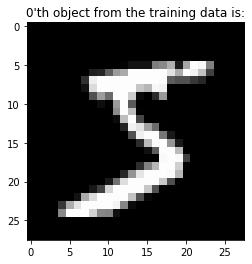

In [5]:
plt.title("0'th object from the training data is:")
plt.imshow(X_train[0], cmap="gray")

The responce for the 0'th object from the training data is:

In [6]:
y_train[0]

5

In order to split the data, we recommed youto usethe function train_test_split from the sklearn library. The following rows split the data in the ratio of 70/30.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=2020)

Firslty, let's convert the data to a familiar format:

In [8]:
dim = 784 # 28*28 
X_train = X_train.reshape(len(X_train), dim)
X_test = X_test.reshape(len(X_test), dim)

Now, we reduce the dimensionality of the data leaving 48 principal components only:

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=48, svd_solver='full')
modelPCA = pca.fit(X_train) 

X_train = modelPCA.transform(X_train)

Importing the libraries: fisrt, responsible for the One-vs-All multiclass classification method; second and third, responsible for the decision tree and random forest.

In [10]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

Training the model:

In [11]:
randomForest = RandomForestClassifier(criterion='gini', min_samples_leaf=10, max_depth=20, n_estimators=10, random_state=2)
rf_clf = OneVsRestClassifier(randomForest).fit(X_train, y_train)

log_reg = LogisticRegression(solver='lbfgs', random_state=2)
log_clf = OneVsRestClassifier(log_reg).fit(X_train, y_train)

dec_tree = DecisionTreeClassifier(criterion='gini', min_samples_leaf=10, max_depth=20, random_state=2)
dec_clf = OneVsRestClassifier(dec_tree).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Evaluatinng the model:

In [13]:
X_test = modelPCA.transform(X_test)

In [14]:
y_pred_rf = rf_clf.predict(X_test)
y_pred_log = log_clf.predict(X_test)
y_pred_dec = dec_clf.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix
CM_rf = confusion_matrix(y_test, y_pred_rf)
CM_log = confusion_matrix(y_test, y_pred_log)
CM_dec = confusion_matrix(y_test, y_pred_dec)

In [17]:
CM_rf

array([[1632,    0,    5,    5,    0,   11,   27,    2,    9,    2],
       [   2, 2019,   20,    9,    2,    7,    4,    6,    3,    3],
       [  18,    7, 1612,   27,   17,    6,   10,   17,   46,    3],
       [   4,    5,   28, 1695,    5,   44,   10,   18,   43,   21],
       [   7,   13,   19,    5, 1589,    1,   29,    8,   22,   63],
       [  15,    2,   12,   60,   15, 1420,   29,    9,   23,    6],
       [  21,    7,   13,    3,    5,   29, 1681,    0,    7,    0],
       [   9,   19,   20,    2,   26,    6,    2, 1738,   11,   53],
       [  17,   16,   25,   56,   15,   44,   14,    9, 1552,   25],
       [  11,   10,   17,   25,   76,   18,    3,   44,   23, 1597]])

The number of correctly classified objects belonging to the class 0 is:

In [20]:
print(CM_rf[8][8],
CM_log[6][6],
CM_dec[2][2])

1552 1664 1489


The number of the objects from the calss 0 classified to the class 8 is:

In [22]:
CM_rf[0][8]

9

In [33]:
import csv
with open('/pred_for_task.csv', newline='') as f:
    reader = csv.reader(f)
    X_new = list(reader)

X_new = np.array(X_new)
dim = 784 # 28*28 
X_new = X_new.reshape(len(X_new), dim)
X_new

ValueError: ignored

Applying the PCA transformation obtained above to the test data:

In [27]:
X_new = modelPCA.transform(X_new)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:73: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)


UFuncTypeError: ignored

In [ ]:
y_rf = rf_clf.predict(X_new[12])
y_log = log_clf.predict(X_new[9])
y_dec = dec_clf.predict(X_new[8])